In [34]:
import pandas as pd
import csv

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import lightgbm
print(lightgbm.__version__)

4.6.0


In [4]:
PAT_TOK = "[PAD]"
RANDOM_SEED = 42

In [5]:
df = pd.read_csv("./data/datasetForAnalysis.csv", sep="\t", quoting=csv.QUOTE_NONE, index_col=0)

In [6]:
df.head()

,lemma,word,aspect,disambig,db_id,text,Gender,Mood,Number,POS,...,nsubj,nsubj_count,obj,obj_count,obl,obl_count,advmod,advmod_count,polarity,polarity_word
0,bacati,baca,imp,imp,set-s2762,"Otpad iz šest priobalnih zemalja, kao i država...",NaN,Ind,Sing,VERB,...,[PAD],0,[PAD],0,[PAD],0,[PAD],0,pos,[PAD]
1,bacati,bacaju,imp,imp,set-s693,Kosovski Srbi bacaju kamenje na vojnike KFOR-a...,NaN,Ind,Plur,VERB,...,[PAD],0,[PAD],0,ponedeljak,1,[PAD],0,pos,[PAD]
2,bacati,bacaju,imp,imp,set-s2765,"""Umesto da bacaju mulj 25-30 km prema pučini, ...",NaN,Ind,Plur,VERB,...,[PAD],0,[PAD],0,[PAD],0,[PAD],0,pos,[PAD]
3,bacati,bacaju,imp,imp,set-s3624,Blokirani razgovori sa MMF bacaju senku na nek...,NaN,Ind,Plur,VERB,...,razgovori,1,[PAD],0,[PAD],0,[PAD],0,pos,[PAD]
4,bacati,bacala,imp,imp,set-s2360,"Prve večeri, publika je bacala flaše na bosans...",Fem,NaN,Sing,VERB,...,[PAD],0,[PAD],0,[PAD],0,[PAD],0,pos,[PAD]


In [7]:
df.describe()

,Person,nsubj_count,obj_count,obl_count,advmod_count
count,2506.000000,4959.000000,4959.000000,4959.000000,4959.000000
mean,2.815642,0.322847,0.116354,0.184311,0.111716
std,0.572429,0.467612,0.320681,0.430189,0.328831
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,0.000000,0.000000,0.000000
max,3.000000,1.000000,1.000000,4.000000,3.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4959 entries, 0 to 4958
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   lemma          4959 non-null   object 
 1   word           4959 non-null   object 
 2   aspect         4959 non-null   object 
 3   disambig       4959 non-null   object 
 4   db_id          4959 non-null   object 
 5   text           4959 non-null   object 
 6   Gender         2084 non-null   object 
 7   Mood           2506 non-null   object 
 8   Number         4590 non-null   object 
 9   POS            4959 non-null   object 
 10  Person         2506 non-null   float64
 11  Tense          4584 non-null   object 
 12  VerbForm       4959 non-null   object 
 13  Voice          2084 non-null   object 
 14  l_tok_3        4959 non-null   object 
 15  l_tok_2        4959 non-null   object 
 16  l_tok_1        4959 non-null   object 
 17  r_tok_1        4959 non-null   object 
 18  r_tok_2      

In [9]:
df = df.fillna("[PAD]")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4959 entries, 0 to 4958
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   lemma          4959 non-null   object
 1   word           4959 non-null   object
 2   aspect         4959 non-null   object
 3   disambig       4959 non-null   object
 4   db_id          4959 non-null   object
 5   text           4959 non-null   object
 6   Gender         4959 non-null   object
 7   Mood           4959 non-null   object
 8   Number         4959 non-null   object
 9   POS            4959 non-null   object
 10  Person         4959 non-null   object
 11  Tense          4959 non-null   object
 12  VerbForm       4959 non-null   object
 13  Voice          4959 non-null   object
 14  l_tok_3        4959 non-null   object
 15  l_tok_2        4959 non-null   object
 16  l_tok_1        4959 non-null   object
 17  r_tok_1        4959 non-null   object
 18  r_tok_2        4959 non-null   ob

In [11]:
df.nunique()

lemma             311
word             1451
aspect              3
disambig            3
db_id            2605
text             2605
Gender              4
Mood                3
Number              3
POS                 1
Person              4
Tense               4
VerbForm            3
Voice               2
l_tok_3          2048
l_tok_2          2060
l_tok_1          1611
r_tok_1          1550
r_tok_2          2330
r_tok_3          2267
l_gr_1             21
l_gr_2             25
l_gr_3             28
r_gr_1              7
r_gr_2             24
r_gr_3             25
nsubj              91
nsubj_count         2
obj                54
obj_count           2
obl               141
obl_count           5
advmod             52
advmod_count        4
polarity            2
polarity_word      10
dtype: int64

In [12]:
y = df[["aspect", "disambig"]]
y.head()

,aspect,disambig
0,imp,imp
1,imp,imp
2,imp,imp
3,imp,imp
4,imp,imp


In [13]:
df = df.drop(["aspect", "disambig", "POS"], axis=1)
df.head()

,lemma,word,db_id,text,Gender,Mood,Number,Person,Tense,VerbForm,...,nsubj,nsubj_count,obj,obj_count,obl,obl_count,advmod,advmod_count,polarity,polarity_word
0,bacati,baca,set-s2762,"Otpad iz šest priobalnih zemalja, kao i država...",[PAD],Ind,Sing,3.0,Pres,Fin,...,[PAD],0,[PAD],0,[PAD],0,[PAD],0,pos,[PAD]
1,bacati,bacaju,set-s693,Kosovski Srbi bacaju kamenje na vojnike KFOR-a...,[PAD],Ind,Plur,3.0,Pres,Fin,...,[PAD],0,[PAD],0,ponedeljak,1,[PAD],0,pos,[PAD]
2,bacati,bacaju,set-s2765,"""Umesto da bacaju mulj 25-30 km prema pučini, ...",[PAD],Ind,Plur,3.0,Pres,Fin,...,[PAD],0,[PAD],0,[PAD],0,[PAD],0,pos,[PAD]
3,bacati,bacaju,set-s3624,Blokirani razgovori sa MMF bacaju senku na nek...,[PAD],Ind,Plur,3.0,Pres,Fin,...,razgovori,1,[PAD],0,[PAD],0,[PAD],0,pos,[PAD]
4,bacati,bacala,set-s2360,"Prve večeri, publika je bacala flaše na bosans...",Fem,[PAD],Sing,[PAD],Past,Part,...,[PAD],0,[PAD],0,[PAD],0,[PAD],0,pos,[PAD]


In [14]:
df_categorical = df.drop(
    [
        "lemma"        ,
        "word"         ,
        "db_id"        ,
        "text"         ,
        "l_tok_3"      ,
        "l_tok_2"      ,
        "l_tok_1"      ,
        "r_tok_1"      ,
        "r_tok_2"      ,
        "r_tok_3"      ,
        "nsubj"        ,
        "obj"          ,
        "obl"          ,
        "advmod"       ,
        "polarity_word",
    ],
    axis=1
).astype(str)
df_categorical.head()

,Gender,Mood,Number,Person,Tense,VerbForm,Voice,l_gr_1,l_gr_2,l_gr_3,r_gr_1,r_gr_2,r_gr_3,nsubj_count,obj_count,obl_count,advmod_count,polarity
0,[PAD],Ind,Sing,3.0,Pres,Fin,[PAD],b,a,c,a,c,a,0,0,0,0,pos
1,[PAD],Ind,Plur,3.0,Pres,Fin,[PAD],b,a,c,u,j,a,0,0,1,0,pos
2,[PAD],Ind,Plur,3.0,Pres,Fin,[PAD],b,a,c,u,j,a,0,0,0,0,pos
3,[PAD],Ind,Plur,3.0,Pres,Fin,[PAD],b,a,c,u,j,a,1,0,0,0,pos
4,Fem,[PAD],Sing,[PAD],Past,Part,Act,b,a,c,a,l,a,0,0,0,0,pos


In [15]:
label_encoder = LabelEncoder()

In [16]:
for column in df_categorical.columns:
    df_categorical[column] = label_encoder.fit_transform(df_categorical[column])

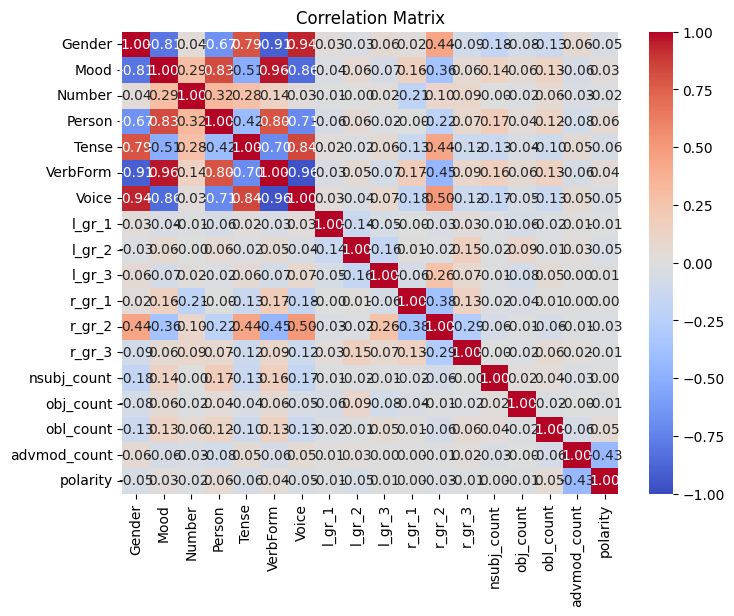

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(
    df_categorical.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1
)
plt.title("Correlation Matrix")
plt.show()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    df_categorical,
    y,
    test_size=0.2,
    random_state=RANDOM_SEED,
    shuffle=True
)

In [20]:
encoder = OneHotEncoder(handle_unknown='warn', sparse_output=False)

In [22]:
pandas_columns = X_train.columns

X_train = pd.DataFrame(encoder.fit_transform(X_train))
X_test  = pd.DataFrame(encoder.transform(X_test))

new_columns = encoder.get_feature_names_out(pandas_columns)
X_train.columns = new_columns
X_test.columns = new_columns

In [25]:
X_train.shape, X_test.shape

((3967, 168), (992, 168))

In [38]:
def experiment(get_model, X_train, y_train, X_test, y_test):

    model = get_model()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(
        classification_report(
            y_test,
            preds,
            zero_division=1.0
        )
    )

In [39]:
experiment(
    lambda: LogisticRegression(),
    X_train,
    y_train["aspect"],
    X_test,
    y_test["aspect"]
)

              precision    recall  f1-score   support

        both       0.97      0.85      0.91        41
         imp       0.91      0.89      0.90       466
        perf       0.89      0.92      0.91       485

    accuracy                           0.90       992
   macro avg       0.92      0.89      0.90       992
weighted avg       0.90      0.90      0.90       992



/home/smertlove/sandbox/hse/SerbAspect/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
experiment(
    lambda: LogisticRegression(),
    X_train,
    y_train["disambig"],
    X_test,
    y_test["disambig"]
)

              precision    recall  f1-score   support

        both       1.00      1.00      1.00         2
         imp       0.92      0.90      0.91       503
        perf       0.90      0.92      0.91       487

    accuracy                           0.91       992
   macro avg       0.94      0.94      0.94       992
weighted avg       0.91      0.91      0.91       992



/home/smertlove/sandbox/hse/SerbAspect/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
experiment(
    lambda: lightgbm.LGBMClassifier(),
    X_train,
    y_train["aspect"],
    X_test,
    y_test["aspect"]
)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 268
[LightGBM] [Info] Number of data points in the train set: 3967, number of used features: 134
[LightGBM] [Info] Start training from score -3.144102
[LightGBM] [Info] Start training from score -0.763365
[LightGBM] [Info] Start training from score -0.711720
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
              precision    recall  f1-score   support

        both       1.00      1.00      1.00        41
         imp       0.97      0.95      0.96       466
        perf       0.96      0.97      0.96       485

    accuracy                           0.96       992
   macro avg       0.97      0.97      0.97       992
weighted avg       0.96      0.96      0.96       992



In [42]:
experiment(
    lambda: lightgbm.LGBMClassifier(),
    X_train,
    y_train["disambig"],
    X_test,
    y_test["disambig"]
)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000391 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 268
[LightGBM] [Info] Number of data points in the train set: 3967, number of used features: 134
[LightGBM] [Info] Start training from score -5.341326
[LightGBM] [Info] Start training from score -0.692895
[LightGBM] [Info] Start training from score -0.703027
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

In [ ]:
model = lightgbm.LGBMClassifier()
model.fit(X_train, y_train["aspect"])
